## Olympics Dataset

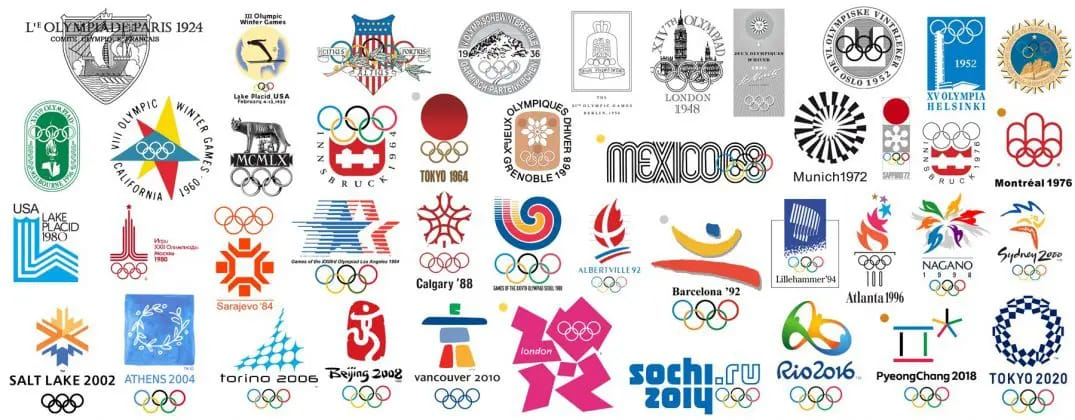

In [ ]:
The ‘dataset on the modern Olympic Games’ comprises all the Games from Athens
1986 to Rio 2016. The Olympics is more than just a quadrennial multi-sport
world championship. It is a lens through which to understand global history,
including shifting geopolitical power dynamics, women’s empowerment, and the
evolving values of society.


In this analysis, our goal is to shed light on major patterns in Olympic history.
How many athletes, sports, and nations are there?
Where do most athletes come from?
Who wins medals? 
What are the characteristic of the athletes (e.g.,gender and physical size)?

In [97]:
#Our first task is to read the dataset.
from scipy.stats import norm
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('olympics.csv')


In [98]:
#the shape of the dataset.
df.shape

(271116, 17)

In [99]:
# Check the first few rows of the DataFrame
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [101]:
#Extract the 'Age' column from the DataFrame
age_column = df['Age']

#Calculate and print summary statistics for the 'Age' column
age_summary = age_column.describe()

print(age_summary)


count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


In [102]:
#the list of columns that have numeric datatypes

b = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_column = []

for column , dtype in df.dtypes.items():
    if dtype.name in b:
        numeric_column.append(column)

print(numeric_column)

['ID', 'Age', 'Height', 'Weight', 'Year']


# Handling the missing values

In [103]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [104]:
#the columns that contain null values along with the count of null values present in each column.

null_column = df.isnull().sum()

for  index , value in null_column.items():
    if value != 0:
        print(index,"-", value)
    

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


In [105]:
#For the columns "Height, Weight and notes", you are going to drop these columns as they are not required in our further 
#analysis.For the "region" column, remove all the rows where the region column is having null values.



df.drop(columns=["notes", "Height", "Weight"], inplace=True)

olympics = df[pd.notnull(df['region'])]


print(olympics.shape)

(270746, 14)


In [113]:
# the unique number of values present in the Medal column.

olympics['Medal'].fillna("DMW", inplace = True)

print(olympics['Medal'].value_counts())





DMW       231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64


# Statistical Analysis of Olympics Dataset

# Handling Missing Values Using Mean

In [182]:
olympics.tail(5)

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
270741,135569,Andrzej ya,M,29.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland
270742,135570,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland
270743,135570,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland
270744,135571,Tomasz Ireneusz ya,M,30.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland
270745,135571,Tomasz Ireneusz ya,M,34.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,DNW,Poland


In [109]:
olympics.isnull().sum()

ID           0
Name         0
Sex          0
Age       9460
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
region       0
dtype: int64

In [ ]:
#We have an Age column that contains some null values. Rather than deleting them,
#fill these missing values by (means of the age of the players belonging to that particular game).

In [112]:
mean=olympics.groupby('Sport')['Age'].mean()
olympics['Age'].fillna(mean, inplace=True)


print(math.ceil(olympics['Age'].mean()))

26


# Probability Distribution of Age

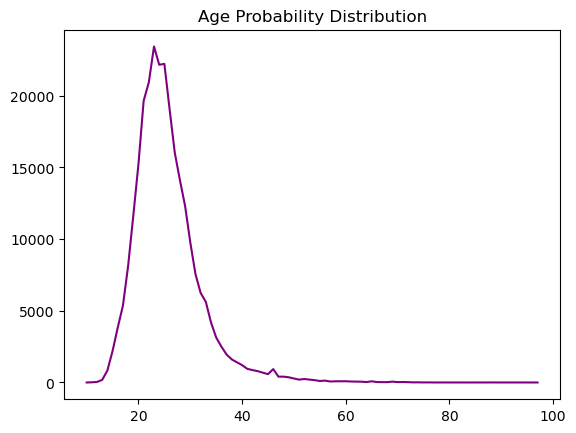

In [125]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics_cleaned.csv')



age = olympics['Age'].value_counts().sort_index()

plt.plot(age.index , age.values , color = 'purple')
plt.title("Age Probability Distribution")
plt.show()



In [149]:

from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

India = olympics[olympics['region'] == 'India']

gold_medals_in_years = India[India['Medal'] == 'Gold']

year = gold_medals_in_years['Year'].value_counts()

skewness = stats.skew(year)

if skewness < 0:
    print("Left skewed")
else:
    print("Right skewed")


Left skewed


## Standard Deviation

In [181]:
import numpy as np 
import pandas as pd
import statistics
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics_cleaned.csv')

#when region is uk is hosting the Olympic games
Uk = olympics[(olympics['region'] == 'UK') & (olympics['City']=='London') & (olympics['Medal']== 'Gold')]
year_count = Uk['Year'].value_counts()
a = statistics.stdev(year_count)

#when region is uk is not hosting the Olympic games
london_not = olympics[(olympics['region'] == 'UK') & (olympics['City'] !='London') & (olympics['Medal']== 'Gold')]
year_counts = london_not['Year'].value_counts()
b = statistics.stdev(year_counts)

print("When region is uk is hosting the Olympic games:" , a)
print("When region is uk is hosting the Olympic games:" , b)

When region is uk is hosting the Olympic games: 71.97453253292676
When region is uk is hosting the Olympic games: 18.14528124684469


In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
a = olympics[olympics['Sport'] == 'Shooting']
age = a['Age']

# Standardize the age data
standardized_age = (age - age.mean()) / age.std()

# Calculate the standardized mean and standard deviation
standardized_mean = standardized_age.mean()
standardized_std = standardized_age.std()

print(round(standardized_mean))

print(round(standardized_std))

0
1


In [265]:
import pandas as pd

olympics = pd.read_csv('olympics_cleaned.csv')

# Factorize the 'Medal' column and create a new column 'medal_labels'
labels, _ = pd.factorize(olympics["Medal"])
olympics["medal_labels"] = labels

# Calculate the correlation between 'Age' and 'medal_labels' and check if it's positive or negative
correlation = olympics["Age"].corr(olympics["medal_labels"])

if correlation > 0:
    print("Positive")
elif correlation < 0:
    print("Negative")
else:
    print("No correlation")


Positive


# IQR

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
a = olympics['Age']
q1 = np.percentile(a,25)
q3 = np.percentile(a,75)

iqr = q3-q1
print("IQR:" ,iqr)

IQR: 6.0


# DataSet Visualization

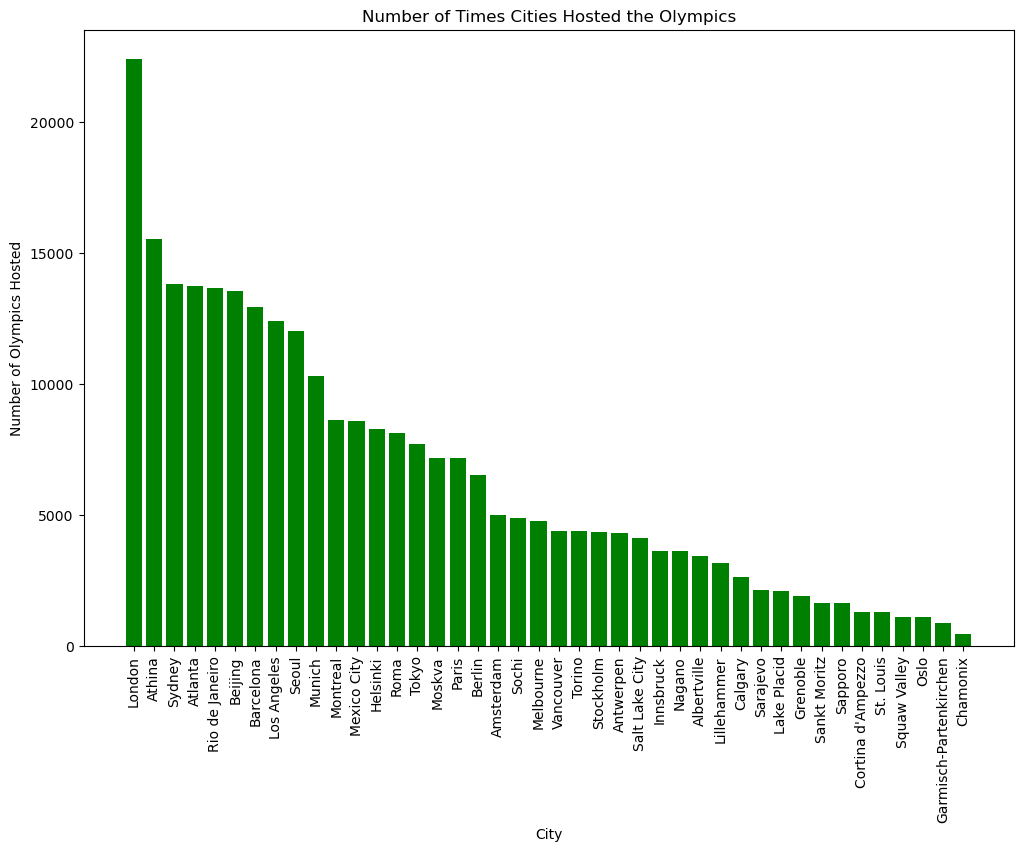

Number of cities where Olympics have been held so far: 42


In [321]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics_cleaned.csv')

cities = olympics['City'].value_counts()

city = cities.index
city_values = cities.values

# Create a bar graph to visualize the number of times each city hosted the Olympics
plt.figure(figsize=(12, 8))
plt.bar(city, city_values , color="green")

plt.title('Number of Times Cities Hosted the Olympics')
plt.xlabel('City')
plt.ylabel('Number of Olympics Hosted')
plt.xticks(rotation= 90)
plt.show()

total_cities= len(cities.index)
print("Number of cities where Olympics have been held so far:",total_cities)


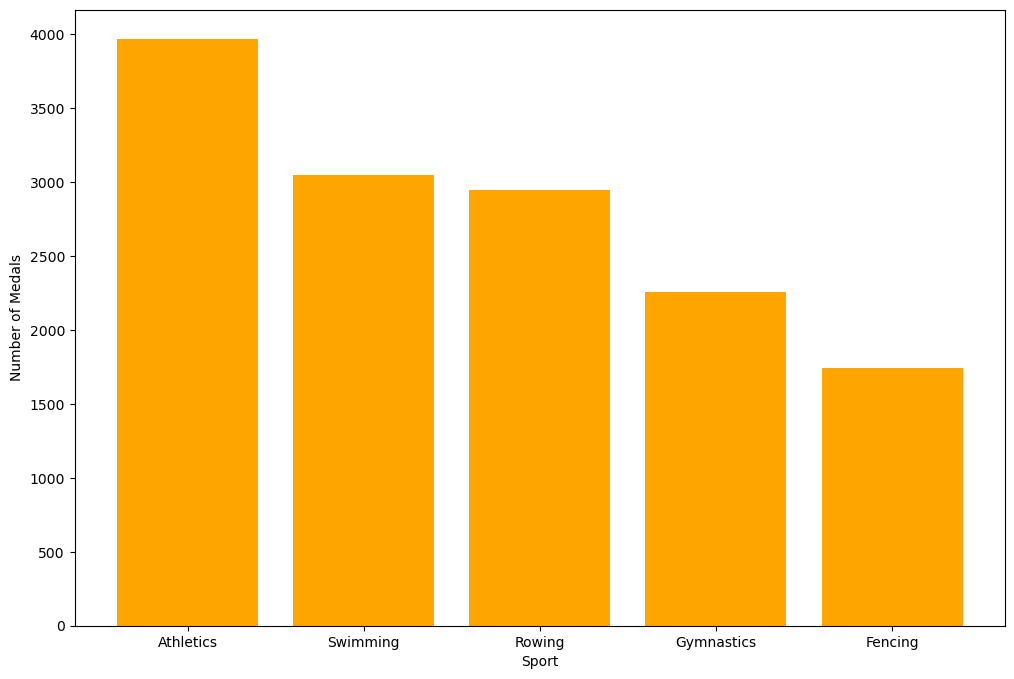

Athletics 3969
Swimming 3047
Rowing 2945
Gymnastics 2256
Fencing 1743


In [280]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics_cleaned.csv')


n_medal = olympics[olympics['Medal'] != 'DNW']
sports = n_medal.groupby('Sport')['Medal'].value_counts()
top_sport = sports.groupby(['Sport']).sum()
sorted_sport = top_sport.sort_values(ascending = False)[:5]


plt.figure(figsize = (12,8))
plt.bar(sorted_sport.index , sorted_sport.values , color = "orange")
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.show()

for sport , value in sorted_sport.items():
    print(sport ,value)


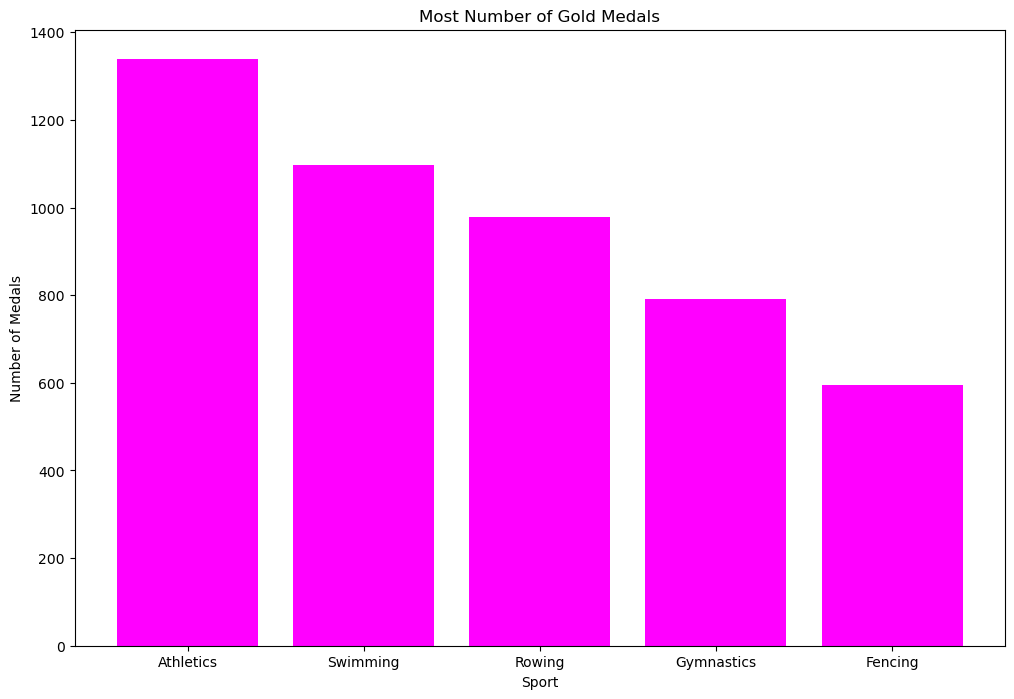

Athletics 1339
Swimming 1098
Rowing 978
Gymnastics 791
Fencing 594


In [303]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics_cleaned.csv')


n_medal = olympics[(olympics['Medal'] != 'DNW') &(olympics['Medal']== 'Gold')]
sports = n_medal.groupby('Sport')['Medal'].value_counts()
top_sport = sports.groupby(['Sport']).sum()
sorted_sport = top_sport.sort_values(ascending = False)[:5]


plt.figure(figsize = (12,8))
plt.bar(sorted_sport.index , sorted_sport.values , color = "magenta")
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.title('Most Number of Gold Medals')
plt.show()


for sport , value in sorted_sport.items():
    print(sport ,value)


India First Gold Medal: 1924


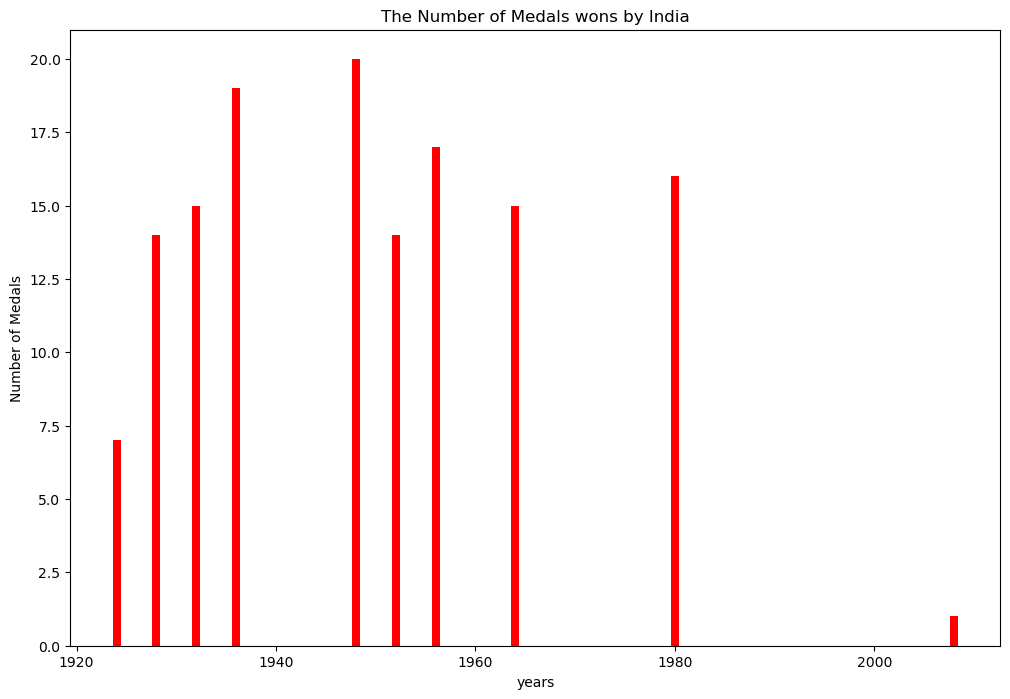

1948    20
1936    19
1956    17
1980    16
1964    15
1932    15
1928    14
1952    14
1924     7
2008     1
Name: Year, dtype: int64


In [346]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics_cleaned.csv')

olympics.head()
india_won_gold = olympics[(olympics['region']=="India") & (olympics['Medal']== "Gold")]
India_First_Gold_Medal =  india_won_gold["Year"].min()
print("India First Gold Medal:" ,India_First_Gold_Medal)


year = india_won_gold['Year'].value_counts()

plt.figure(figsize = (12,8))
plt.bar(year.index, year.values , color = "red")
plt.xlabel('years')
plt.ylabel('Number of Medals')
plt.title('The Number of Medals wons by India')
plt.show()
print(year)

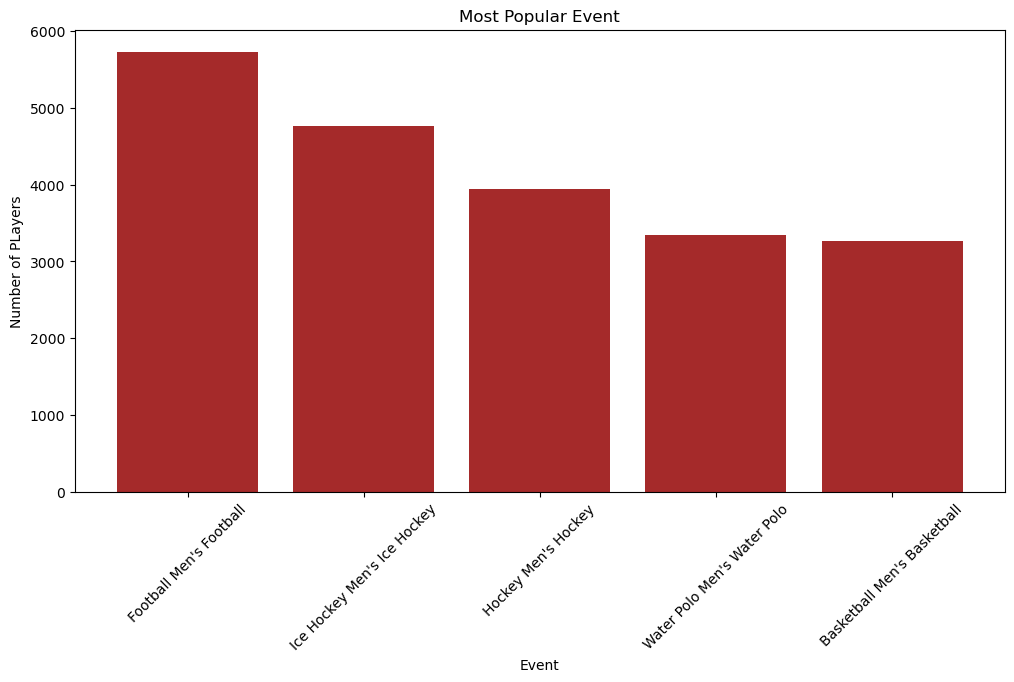

Most Popular Event: Football Men's Football


In [322]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
olympics.head()
top_player = olympics.groupby('Event')['Name'].count().sort_values(ascending = False)

plt.figure(figsize = (12,6))
plt.bar(top_player.index[:5] , top_player.values[:5] , color = "brown")
plt.xticks(rotation = 45)
plt.xlabel("Event")
plt.ylabel("Number of PLayers")
plt.title("Most Popular Event")
plt.show()

top_sport = top_player.index[0]

print("Most Popular Event:",top_sport)


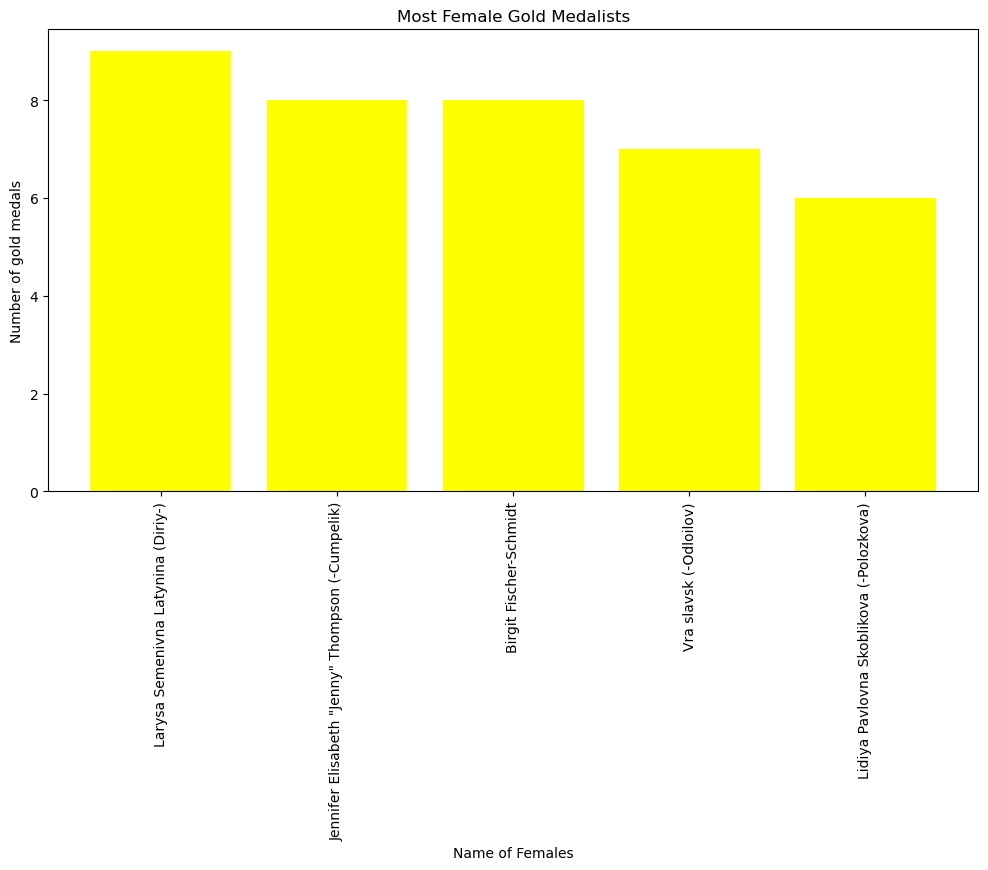

Larysa Semenivna Latynina (Diriy-)  -  9
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  -  8
Birgit Fischer-Schmidt  -  8
Vra slavsk (-Odloilov)  -  7
Lidiya Pavlovna Skoblikova (-Polozkova)  -  6


In [345]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics_cleaned.csv')

female = olympics[(olympics["Sex"]=='F') & (olympics["Medal"] == "Gold")]
top_female = female['Name'].value_counts().sort_values(ascending = False)[:5]

plt.figure(figsize=(12,6))
plt.bar(top_female.index, top_female.values , color = "Yellow")
plt.ylabel("Number of gold medals")
plt.xlabel("Name of Females")
plt.title("Most Female Gold Medalists")
plt.xticks(rotation=90)
plt.show()

for index, value in top_female.items():
    print(index ," - " , value)


# THANKU
## -RIYA RAJPUT